# Loan Approval Prediction

Predicts whether the loan will be approved by the bank, by analyzing the customer's information. The factors that affect the loan approval are analyzed here.

In [75]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [76]:
# Load the dataset
df = pd.read_csv("C:/Users/anany/Downloads/loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Data Preprocessing

In [77]:
df.shape

(4269, 13)

In [78]:
# Dropping loan_id column 
df.drop(columns='loan_id', inplace=True)

In [79]:
# Check whether there are missing values
df.isnull().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [80]:
# Check data types of the columns
df.dtypes

 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [81]:
print(df.columns)

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


Categorizing residential, commercial, luxury, and bank into movable and immovable assets. Residential and Commercial assets are added to Immovable assets and Luxury and Bank assets are added to Movable assets


In [82]:
# movable_assets
df['movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

# immovable_assets
df['immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

In [83]:
# Drop columns
df.drop(columns=[' bank_asset_value', ' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value'])

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,movable_assets,immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000
...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,Rejected,4100000,3300000
4265,0,Not Graduate,Yes,3300000,11300000,20,559,Approved,12900000,7100000
4266,2,Not Graduate,No,6500000,23900000,18,457,Rejected,25400000,13600000
4267,1,Not Graduate,No,4100000,12800000,8,780,Approved,19900000,8900000


In [84]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,movable_assets,immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,5.380000e+07,4.660000e+07


In [85]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,movable_assets,immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,34400000,20600000


## Data Analysis

Text(0.5, 1.0, 'Number of Dependents')

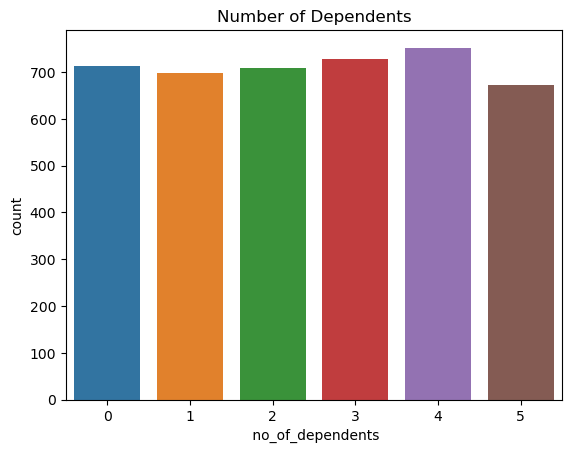

In [86]:
# No. of dependents
sns.countplot(x = ' no_of_dependents', data = df).set_title('Number of Dependents')

The graph number of dependent individuals on the loan applicant. We can observe that there are more applicants with 3 and 4 dependents than other categories.
no_of_dependents ↑ -→ disposable_income ↓

Hence number of applicants with 0 or 1 dependent will have higher chances of loan approval.

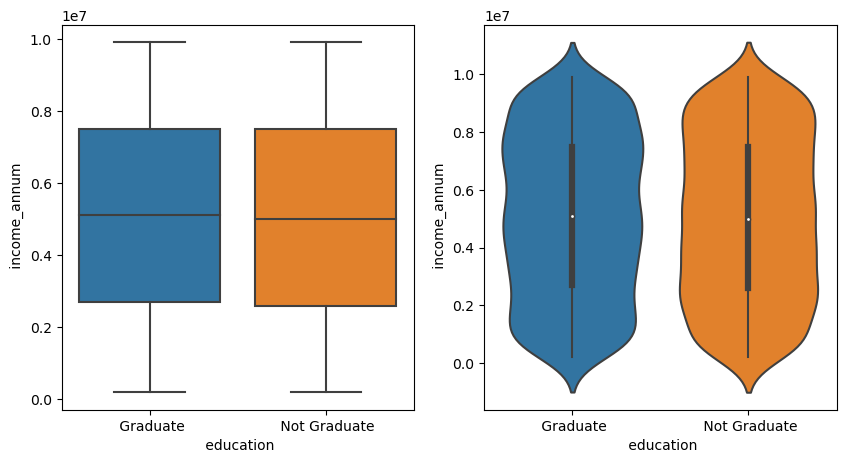

In [87]:
# Education and income
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x = ' education', y = ' income_annum', data=df, ax=ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data=df, ax=ax[1])


The graph - education vs annual income. In the boxplot, the graduates have a slight increase in the income. The violinplot shows distribution of income among the graduates and the non graduates.

So there is not much change in annual income of graduates and non graduates. Education might not play a major role in approval of loan.

Text(0.5, 1.0, 'Self Employed')

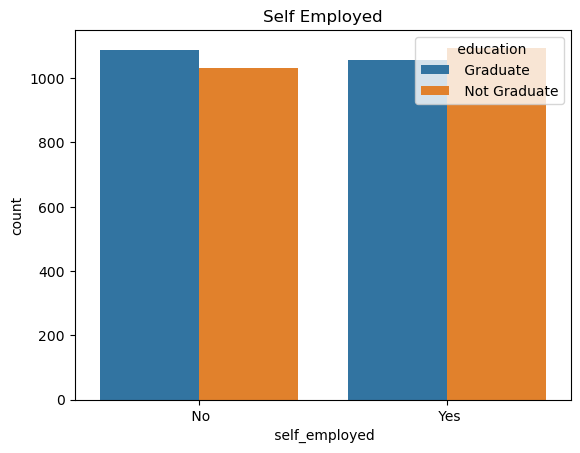

In [88]:
# Employment status and education
sns.countplot(x = ' self_employed', data = df, hue = ' education').set_title('Self Employed')

The graph demonstrates the number of self employed applicants along with their education. Here we can see that, majority of the graduates are not self employed. The graduate applicants are more likely to be employees and non graduates are more likely to be self employed. This can be an important factor while predicting the loan approval as both the groups are likely to pay back the loan because employees have stable income and self employed applicants might earn more.

Text(0.5, 1.0, 'Loan amount vs. Loan Term')

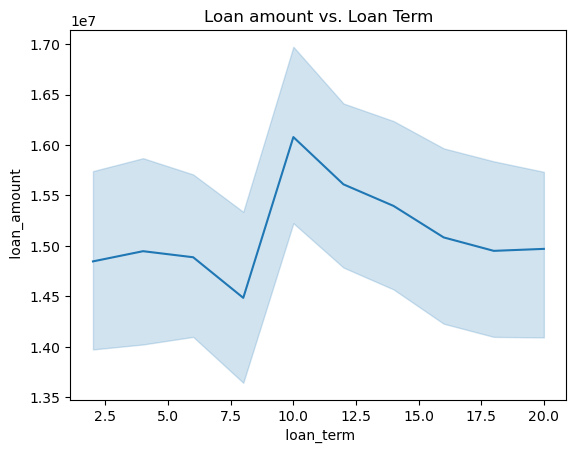

In [89]:
# Loan Amount and Tenure
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df).set_title('Loan amount vs. Loan Term')

The graph demonstrates that the loan amount is significantly higher for the loan tenure.

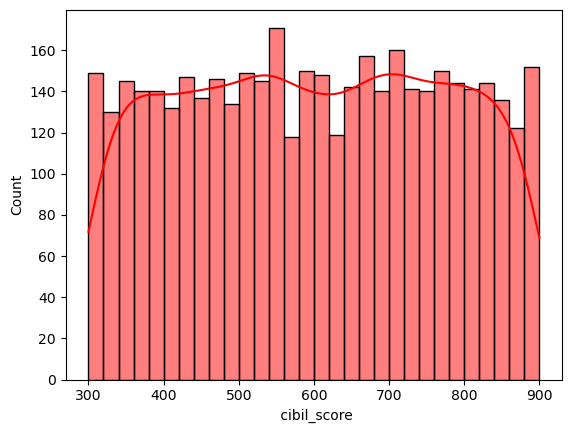

In [90]:
# Cibil Score Distribution
sns.histplot(df[' cibil_score'], bins = 30, kde = True, color = 'red')

    Cibil Score Range   Quality 
           300-549       Poor   
           550-649       Fair   
           650-749       Good   
           750-900       Excellent   
           
Majority of the customers have cibil score below 649. There are also many who have cibil score above 649, which is a good sign. From this, the customers with cibil score above 649 are more likely to get their loan approved. 

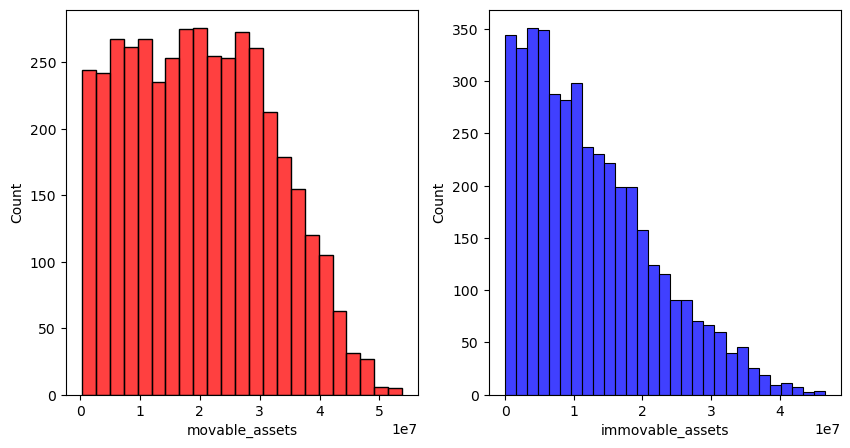

In [91]:
# Asset Distribution
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['movable_assets'], ax=ax[0], color='red')
sns.histplot(df['immovable_assets'], ax=ax[1], color='blue')

The graph demonstrates the distribution of movable and immovable assets in the dataset. As the movable assets increase, there is a slight trend of applicants decreasing. On the other hand, ss the immovable assets increase, there is a strong trend of applicants decreasing. 

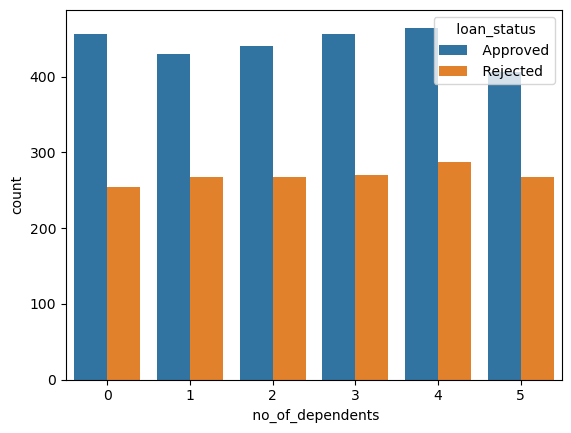

In [92]:
# Number of Dependents vs. Loan Status
sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status')

The assumption regarding the loan approval based on the number of dependents is not true as there is no major change in the loan approval count with increase in number of dependents.

Text(0.5, 1.0, 'Loan Status vs. Education')

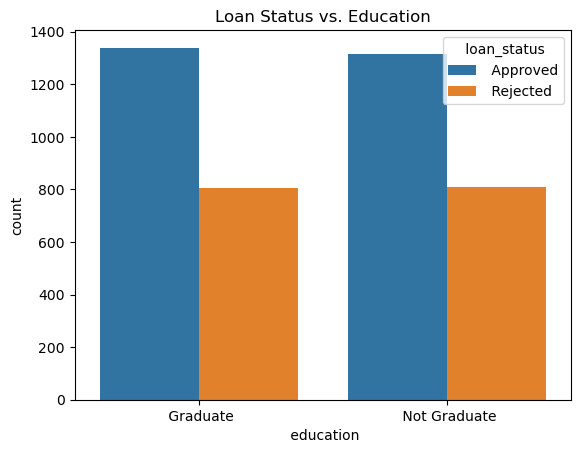

In [93]:
# Education vs Loan Status
sns.countplot(x = ' education', hue = ' loan_status', data = df).set_title('Loan Status vs. Education')

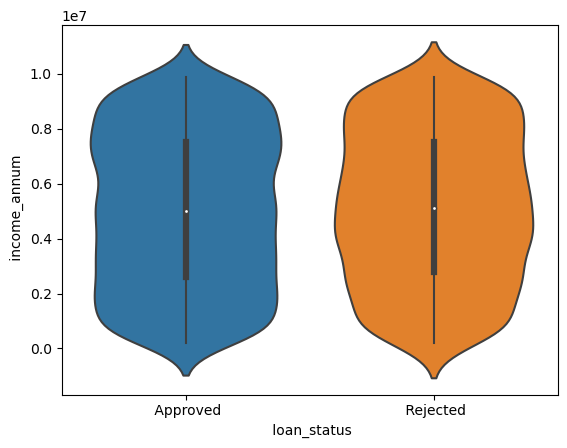

In [94]:
# Annual Income vs Loan Status
sns.violinplot(x=' loan_status', y=' income_annum', data=df)

The approved loan applicants tend to have higher annual income from the violinplot - higher density near 8M annual income.

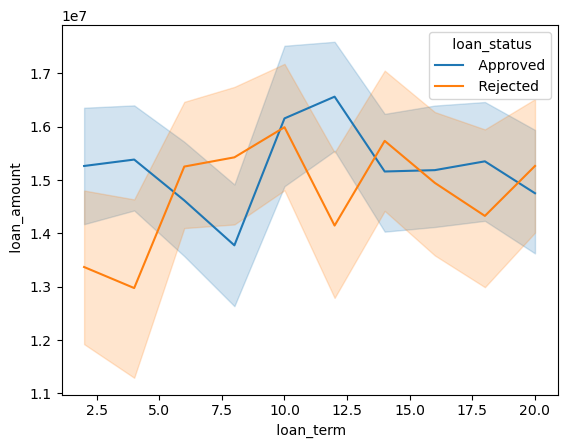

In [95]:
# Loan Amount and Tenure vs. Loan Status
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, hue=' loan_status')

This graph demonstrates the relation between loan amount, loan term and loan status. The approved loans tend to have higher amount and shorter repayment tenure. On the other hand, the rejected loans tend to have lower amount and longer repayment tenure. This could affect the loan acceptance and rejection of an applicant.

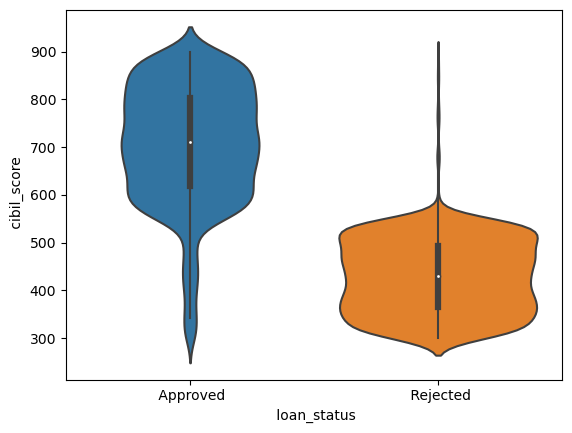

In [96]:
# Cibil Score vs. Loan Status
sns.violinplot(x=' loan_status', y=' cibil_score', data=df)

From the violinplot, we can see that where the there is a high distribution above 600 cibil score from the loan approved category. The distribution of the loan not approved category is more spread out and has cibil score less than 550. Majority of the applicants have a poor/fair cibil score which affects their loan approval.

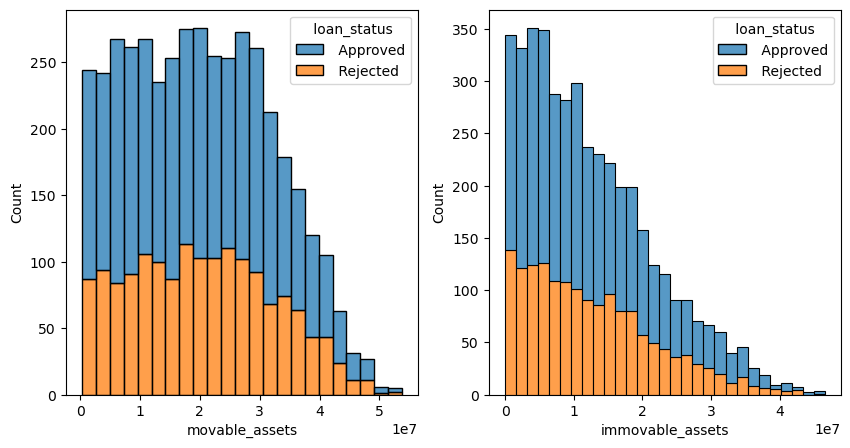

In [97]:
# Assets vs. Loan Status
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x  = 'movable_assets', data = df, ax=ax[0], hue = ' loan_status', multiple='stack')
sns.histplot(x =  'immovable_assets', data = df, ax=ax[1], hue  = ' loan_status', multiple='stack')

These two graph demonstrates the relation between the movable and immovable assets along with the loan status. With increase in the assets the chances of loan approval increases and with a decrease it increases.

### Data Preprocessing

In [98]:
# Label Encoding the categorical variables
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [99]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,movable_assets,immovable_assets
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,34400000,20600000


### Coorelation Matrix Heatmap

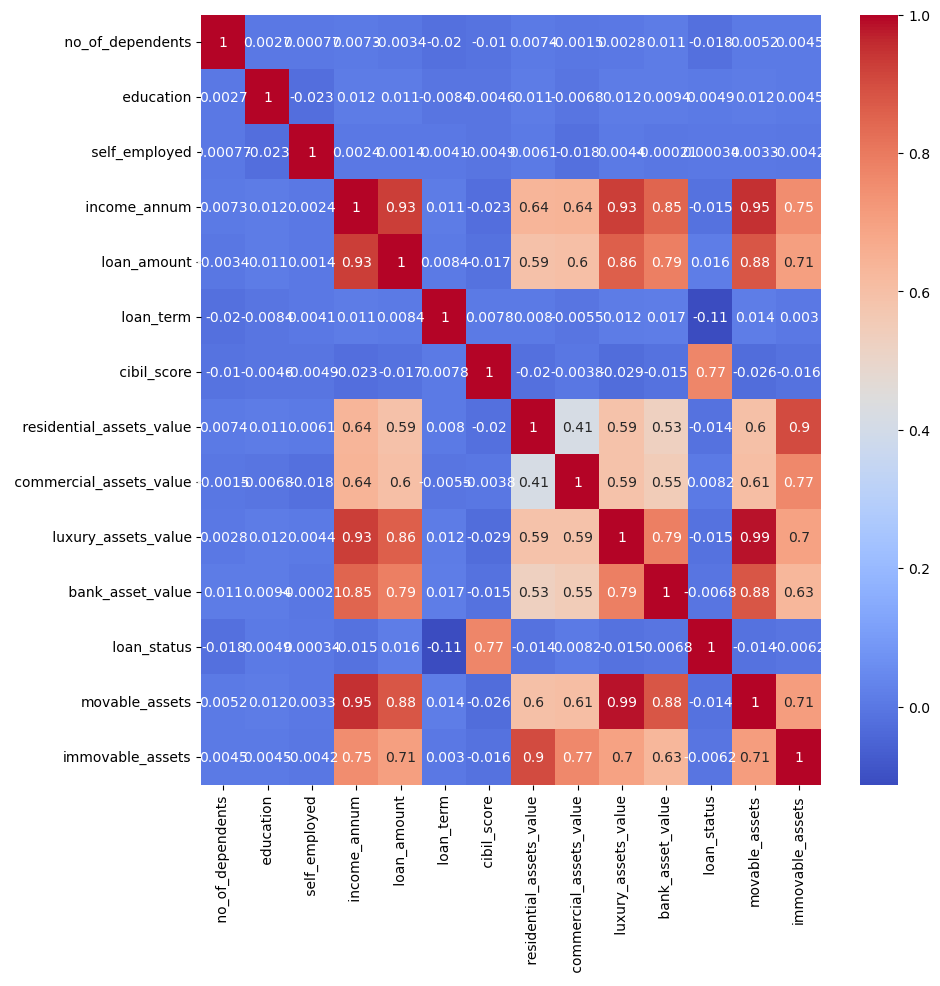

In [100]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Here are some strong correlations from the heatmap

1. Income and Movable Assets
2. Income and Immovable Assets
3. Loan Amount and Income
4. Loan Status and Cibil Score
5. Movable Assets and Immovable Assets
6. Movable Assets and Loan Amount
7. Immovable Assets and Loan Amount

Text(0.5, 1.0, 'Immovable_assets vs loan_amount')

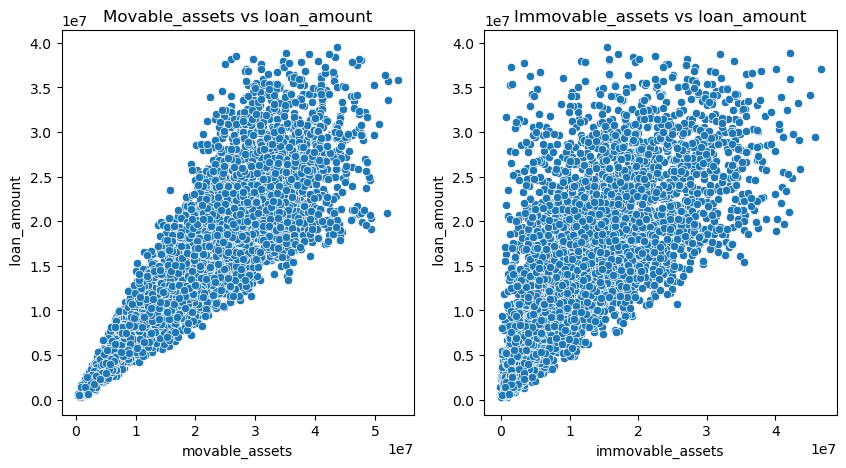

In [101]:
# Exploring correlation between Assets and Loan Amount
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.scatterplot(x='movable_assets', y = ' loan_amount', data = df, ax=ax[0]).set_title('Movable_assets vs loan_amount')
sns.scatterplot(x='immovable_assets', y = ' loan_amount', data = df, ax=ax[1]).set_title('Immovable_assets vs loan_amount')

The loan amount has a positive relation with movable and immovable assets. The more the assets, the more the loan amount issued.

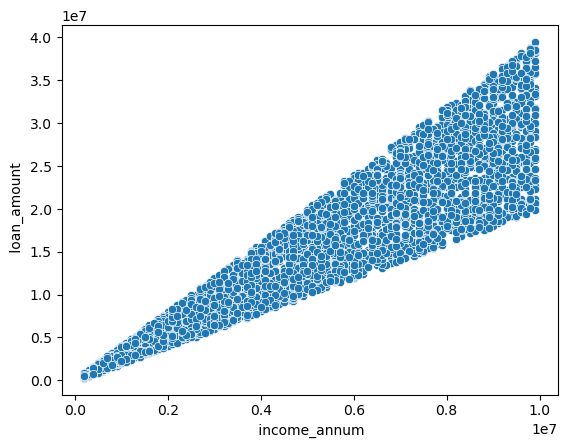

In [102]:
# Exploring correlation between Loan Amount and Income
sns.scatterplot(x=' income_annum', y = ' loan_amount', data = df)

From the graph, we can observe that the higher the income, the higher the loan amount.

## Train Test Split

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(' loan_status', axis=1), df[' loan_status'], test_size=0.2, random_state=42)

## Model

Decision Tree and Random Forest classifiers will be used to predict the status of loan approval

In [104]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Creating decision tree object
decision_tree = DecisionTreeClassifier()

In [105]:
# Training the model with training data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [106]:
# training accuracy
decision_tree.score(X_train, y_train)

1.0

In [107]:
# Predicting loan approval status
decision_tree_pred = decision_tree.predict(X_test)

### Random Forest Classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier

# Creating a classifier
rfc = RandomForestClassifier()

In [109]:
# Training model with the training data
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [110]:
# Training accuracy
rfc.score(X_train, y_train)

1.0

In [111]:
# Predicting the loan approval status
rfc_pred = rfc.predict(X_test)

## Model Evaluation

Text(518.4494949494949, 0.5, 'Actual')

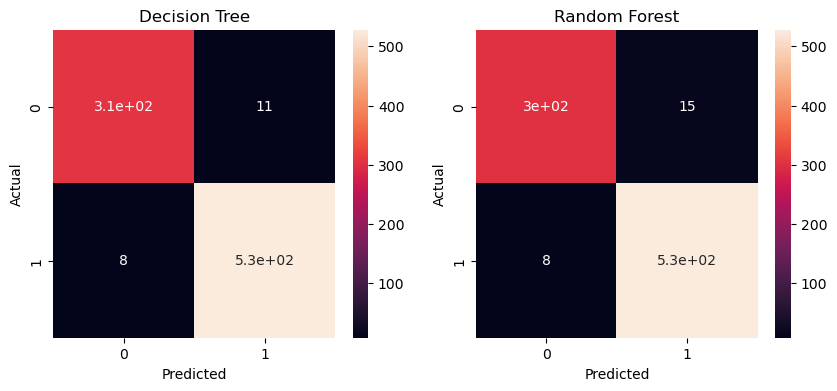

In [113]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,2,figsize=(10,4))

sns.heatmap(confusion_matrix(y_test, decision_tree_pred), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

The above confusion matrix visualizes the true positive and true negative value counts in both the ML models. The decision tree classfier has 19 false positve and negative values where has random forest classifier has 23 false postive and negative values. Decision tree classifier has better accuracy.

C:\Users\anany\AppData\Local\Temp\ipykernel_7100\4136391137.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x = y_test, hist = False, color = "r", label = "Actual Value")
C:\Users\anany\AppData\Local\Temp\ipykernel_7100\4136391137.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

Text(0.5, 1.0, 'Actual vs Predicted Values for Decision Tree Classifier')

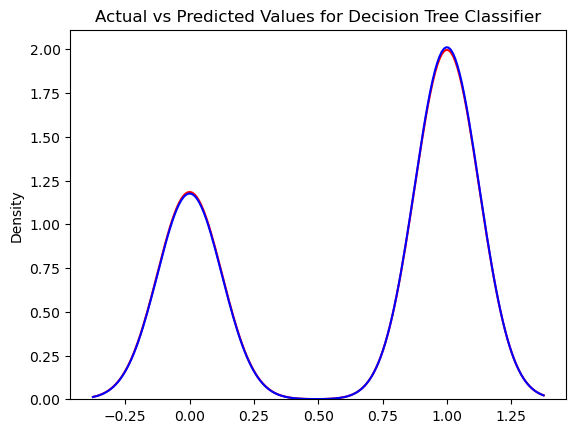

In [114]:
# Distribution Plot
ax = sns.distplot(x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot(x = decision_tree_pred, hist = False, color = "b", label = "Predicted Value", ax=ax)
plt.title('Actual vs Predicted Values for Decision Tree Classifier')

C:\Users\anany\AppData\Local\Temp\ipykernel_7100\1367839858.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
C:\Users\anany\AppData\Local\Temp\ipykernel_7100\1367839858.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



Text(0.5, 1.0, 'Actual vs Fitted Values for Random Forest Classfier')

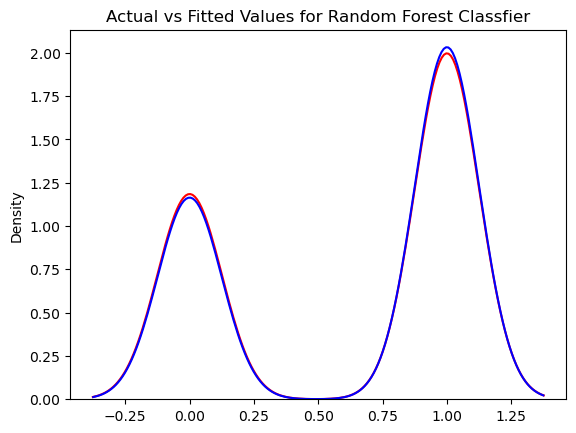

In [115]:
ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot( x = rfc_pred, hist = False, color = "b", label = "Fitted Values", ax = ax)
plt.title('Actual vs Fitted Values for Random Forest Classfier')

The distribution plot of the models are similar. Decision tree classifier is a better model than the random forest classifier as the distribution density of the predicted value overlaps with the actual values in decision tree classifier while there is minute difference seen in case of the random forest classifier.

In [116]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, decision_tree_pred))
print(classification_report(y_test, rfc_pred))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       318
           1       0.97      0.99      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [121]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Decision Tree Classifier
print('Decision Tree Classifier')
print('R2 score: ', r2_score(y_test, decision_tree_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, decision_tree_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, decision_tree_pred))
print('\n')

# Random Forest Classifier
print('Random Forest Classifier')
print('R2 score: ', r2_score(y_test, rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfc_pred))

Decision Tree Classifier
R2 score:  0.9048038111330141
Mean Squared Error:  0.02224824355971897
Mean Absolute Error:  0.02224824355971897


Random Forest Classifier
R2 score:  0.8847625082136487
Mean Squared Error:  0.026932084309133488
Mean Absolute Error:  0.026932084309133488


From all the observations, we can conclude that decision tree classifier is a better ML model to predict the loan approval status of a customer.

The Loan Approval Prediction analysis aimed to assess the bank's likelihood of approving loans based on customer data, successfully revealing several insights. The data was clean and additional asset features were created to enhance the prediction model. Exploratory analysis indicated that fewer dependents might increase loan approval odds, while the impact of education on income was minimal. Notably, a higher CIBIL score markedly improved approval chances. In comparing the ML models, the Decision Tree classifier was more accurate than the Random Forest classifier, making it a better choice for predicting loan approvals.